In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [13]:
from urllib.request import urlopen
from bs4 import BeautifulSoup


In [14]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)


In [15]:
soup = BeautifulSoup(html, 'html.parser')
type(soup)


bs4.BeautifulSoup

In [ ]:
bs4.BeautifulSoup


In [17]:
# Get the title
title = soup.title
print(title)


<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [18]:
# Print out the text
text = soup.get_text()
#print(soup.text)


In [19]:
soup.find_all('a')


[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><img

In [20]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))


mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [21]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:10])


[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Time</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>, <tr data-bib="687">
<td>3</td>
<td>687</td>
<td>

                    FRANCISCO MAYA

           

In [22]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)


[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

In [23]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)


[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


In [24]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)


[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


str

In [25]:
df = pd.DataFrame(list_rows)
df.head(10)


,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


Data Manipulation and Cleaning

In [26]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)


,0,1,2,3,4,5,6,7,8
0,[],None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [27]:
df1[0] = df1[0].str.strip('[')
df1.head(10)


,0,1,2,3,4,5,6,7,8
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [28]:
col_labels = soup.find_all('th')


In [29]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)


['[Place, Bib, Name, Gender, City, State, Time, Gun Time, Team]']


In [30]:
df2 = pd.DataFrame(all_header)
df2.head()


,0
0,"[Place, Bib, Name, Gender, City, State, Time, ..."


In [31]:
df2 = pd.DataFrame(all_header)
df2.head()


,0
0,"[Place, Bib, Name, Gender, City, State, Time, ..."


In [32]:
df3 = df2[0].str.split(',', expand=True)
df3.head()


,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]


In [33]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)


,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]


In [34]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()


,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None


In [35]:
df5.info()
df5.shape


<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     583 non-null    object
 1    Bib       581 non-null    object
 2    Name      578 non-null    object
 3    Gender    578 non-null    object
 4    City      578 non-null    object
 5    State     578 non-null    object
 6    Time      578 non-null    object
 7    Gun Time  578 non-null    object
 8    Team]     578 non-null    object
dtypes: object(9)
memory usage: 45.5+ KB


(583, 9)

In [36]:
df6 = df5.dropna(axis=0, how='any')


In [37]:
df7 = df6.drop(df6.index[0])
df7.head()


,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [38]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()


,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [39]:
df7['Team'] = df7['Team'].str.strip(']')
df7.head()


,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [40]:
print(df7.columns)

df7.columns = df7.columns.str.strip()


Index(['Place', ' Bib', ' Name', ' Gender', ' City', ' State', ' Time',
       ' Gun Time', 'Team'],
      dtype='object')


Data Analysis and Visualization

In [41]:
if 'ChipTime' in df7.columns:
    time_list = df7['ChipTime'].tolist()
else:
    print("The column 'ChipTime' is not found!")


The column 'ChipTime' is not found!


In [42]:
# Step 1: Check the column names
print(df7.columns)

# Step 2: Remove extra spaces (if any)
df7.columns = df7.columns.str.strip()

# Step 3: Try to access the column again if it exists
if 'Time' in df7.columns:
    time_list = df7['Time'].tolist()
else:
    print("The column 'Time' does not exist!")


Index(['Place', 'Bib', 'Name', 'Gender', 'City', 'State', 'Time', 'Gun Time',
       'Team'],
      dtype='object')


In [43]:
time_mins = []
for i in time_list:
    # Split time string into parts
    parts = i.split(':')
    
    # Handle both HH:MM and HH:MM:SS formats
    if len(parts) == 2:  # Format: HH:MM
        h, m = parts
        s = '00'  # Default seconds to 00
    elif len(parts) == 3:  # Format: HH:MM:SS
        h, m, s = parts
    else:
        continue  # Skip invalid time format

    # Calculate total time in minutes
    math = (int(h) * 3600 + int(m) * 60 + int(s)) / 60
    time_mins.append(math)


In [44]:
df7['Runner_mins'] = time_mins
df7.head()


,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team,Runner_mins
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,,2181.0
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...,2202.0
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,,2264.0
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,,2314.0
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...,2361.0


In [45]:
df7.describe(include=[np.number])


,Runner_mins
count,577.000000
mean,1659.333016
std,1515.585173
min,60.016667
25%,68.300000
50%,2543.000000
75%,3109.000000
max,3595.000000


In [46]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5


([<matplotlib.axis.XTick at 0x14bffbee750>], [Text(1, 0, 'Runners')])

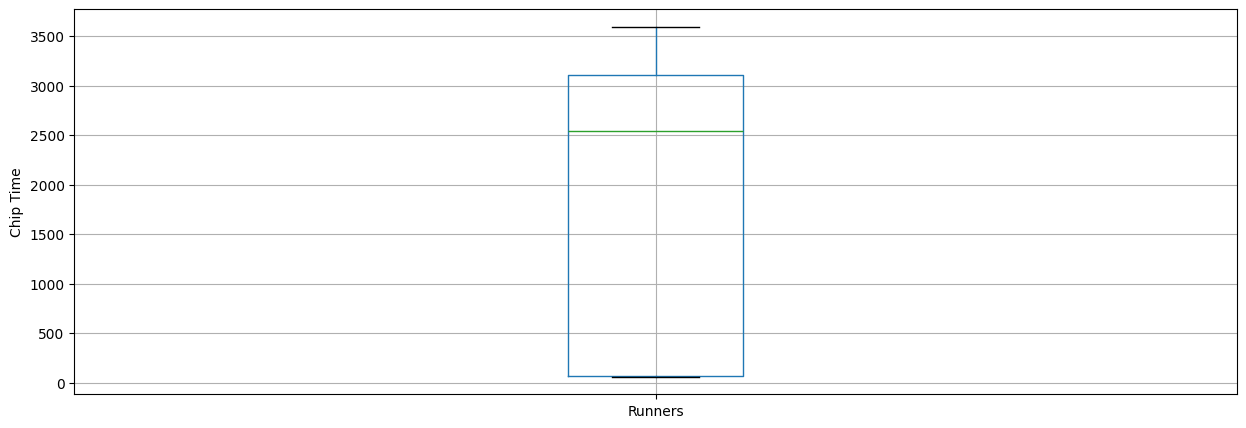

In [47]:
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])


C:\Users\Uma\AppData\Local\Temp\ipykernel_2272\3905679130.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})


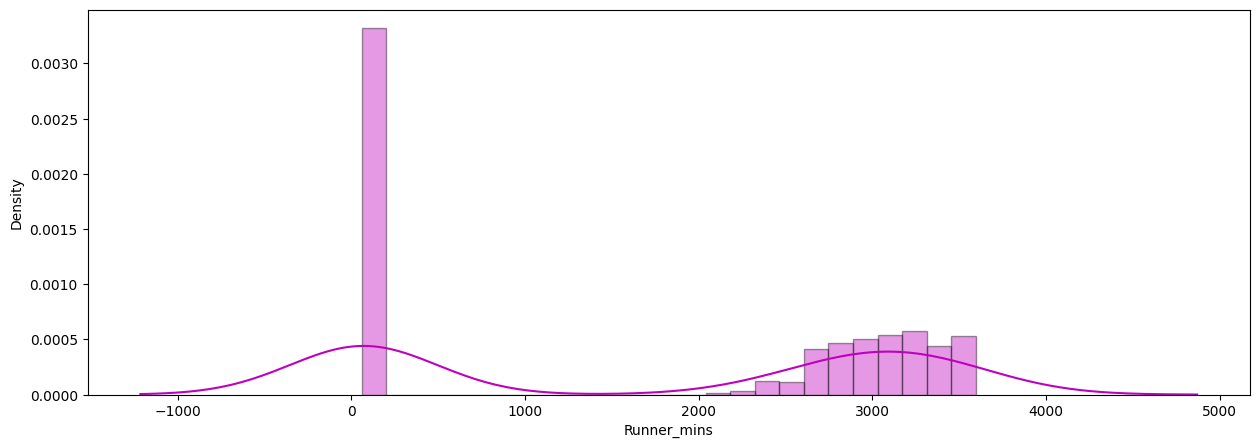

In [48]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()


Index(['Place', 'Bib', 'Name', 'Gender', 'City', 'State', 'Time', 'Gun Time',
       'Team', 'Runner_mins'],
      dtype='object')


C:\Users\Uma\AppData\Local\Temp\ipykernel_2272\2045967354.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(f_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor': 'black'}, label='Female')
C:\Users\Uma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2464: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Uma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encount

<Axes: xlabel='Runner_mins'>

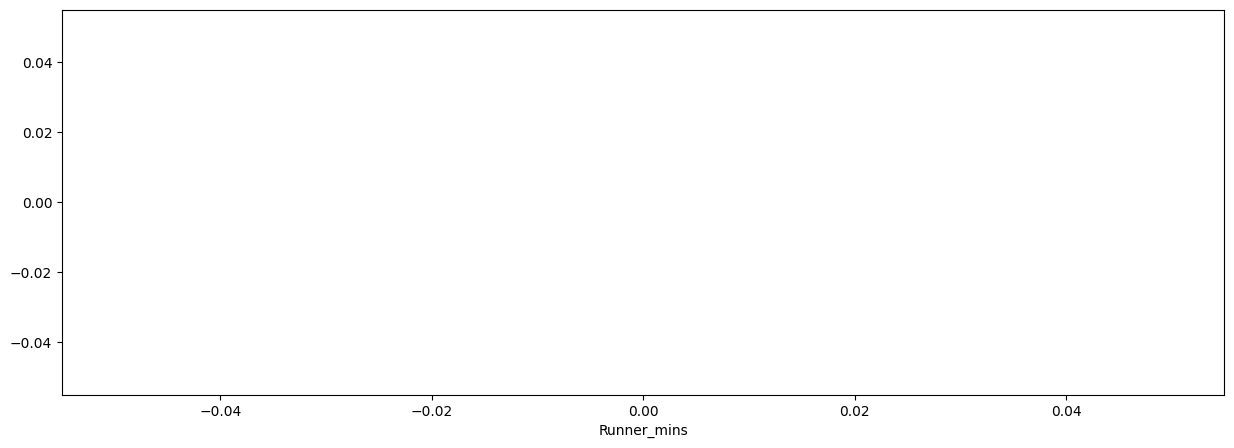

In [49]:
# Step 1: Clean column names by removing leading/trailing spaces
df7.columns = df7.columns.str.strip()

# Step 2: Check the cleaned column names
print(df7.columns)

# Step 3: Now you can access the 'Gender' column correctly
f_fuko = df7.loc[df7['Gender'] == 'F']['Runner_mins']
m_fuko = df7.loc[df7['Gender'] == 'M']['Runner_mins']

# Plot or use the data as needed
sns.distplot(f_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor': 'black'}, label='Female')


In [50]:
# Step 1: Clean column names by removing leading/trailing spaces
df7.columns = df7.columns.str.strip()

# Step 2: Check the cleaned column names
print(df7.columns)

# Step 3: Group by the 'Gender' column and get descriptive stats
g_stats = df7.groupby("Gender", as_index=True).describe()
print(g_stats)


Index(['Place', 'Bib', 'Name', 'Gender', 'City', 'State', 'Time', 'Gun Time',
       'Team', 'Runner_mins'],
      dtype='object')
       Runner_mins                                                  \
             count         mean          std        min        25%   
Gender                                                               
F            163.0  1078.874131  1485.525309  60.200000  66.550000   
M            414.0  1887.871176  1467.178242  60.016667  69.320833   

                                      
                50%      75%     max  
Gender                                
F         75.216667  2888.00  3595.0  
M       2722.000000  3145.75  3593.0  


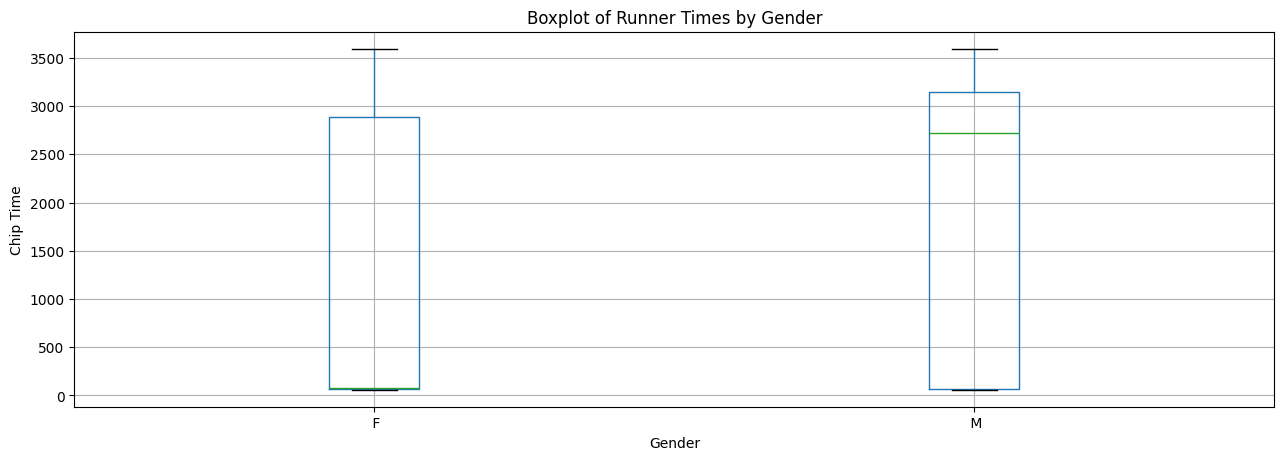

In [51]:


# Step 2: Create the boxplot
df7.boxplot(column='Runner_mins', by='Gender')
plt.ylabel('Chip Time')
plt.title('Boxplot of Runner Times by Gender')
plt.suptitle("")  # Remove automatic title
plt.show()
